In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuraciones:

- initial_temp = np.logspace(2,6, num=6) #[1e2, 1e3, 1e4, 1e5, 1e6]
- final_temps = np.logspace(-3,1,num=5) #[1e-3, 1e-2, 1e-1, 1, 10]
- alphas = [0.90, 0.93, 0.95, 0.97, 0.98, 0.99, 0.995, 0.999]
- max_iters = [5_000, 10_000, 50_000, 100_000, 250_000]

In [28]:
df285 = pd.read_csv("../../results/configurations/experimento1-INF285.csv")
df295 = pd.read_csv("../../results/configurations/experimento1-INF295.csv")

total_285 = 31
total_295 = 26

In [29]:
print(df285.head())
print(df285.info())

  config_id  initial_temp  final_temp  alpha  max_iter  time  final_fitness  \
0   cfg_001         100.0       0.001    0.9      5000  0.17      22.666667   
1   cfg_002         100.0       0.001    0.9     10000  0.12      24.833333   
2   cfg_003         100.0       0.001    0.9     50000  0.12      23.833333   
3   cfg_004         100.0       0.001    0.9    100000  0.22      24.333333   
4   cfg_005         100.0       0.001    0.9    250000  0.19      24.833333   

   validity  
0      True  
1      True  
2      True  
3      True  
4      True  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   config_id      1000 non-null   object 
 1   initial_temp   1000 non-null   float64
 2   final_temp     1000 non-null   float64
 3   alpha          1000 non-null   float64
 4   max_iter       1000 non-null   int64  
 5   time           1000 non

In [30]:
valid_df285 = df285[df285["validity"]].copy()
valil_df295 = df295[df295["validity"]].copy()

best_config_285 = valid_df285.sort_values(
    by=["final_fitness", "time"], ascending=[False, True]
).iloc[0]

best_config_295 = valil_df295.sort_values(
    by=["final_fitness", "time"], ascending=[False, True]
).iloc[0]

In [47]:
print("Mejor configuración encontrada INF-285:")
print(best_config_285)
print(f"Fitness normalizado: {round(best_config_285['final_fitness']*100 / total_285, 2)}\n")

print("Mejor configuración encontrada INF-295:")
print(best_config_295)
print(f"Fitness normalizado: {round(best_config_295['final_fitness']*100 / total_295,2)}")

Mejor configuración encontrada INF-285:
config_id          cfg_122
initial_temp         100.0
final_temp             1.0
alpha                  0.9
max_iter             10000
time                  0.07
final_fitness    26.333333
validity              True
Name: 121, dtype: object
Fitness normalizado: 84.95

Mejor configuración encontrada INF-295:
config_id          cfg_161
initial_temp         100.0
final_temp            10.0
alpha                  0.9
max_iter              5000
time                  0.05
final_fitness    17.333333
validity              True
Name: 160, dtype: object
Fitness normalizado: 66.67


In [34]:
print("Resumen estadístico de las soluciones válidas:")
valid_df = valid_df285
print(valid_df.describe())

Resumen estadístico de las soluciones válidas:
         initial_temp   final_temp        alpha       max_iter        time  \
count     1000.000000  1000.000000  1000.000000    1000.000000  1000.00000   
mean    222220.000000     2.222200     0.964250   83000.000000     3.28969   
std     390885.232344     3.908852     0.032806   90244.912013     6.35400   
min        100.000000     0.001000     0.900000    5000.000000     0.02000   
25%       1000.000000     0.010000     0.945000   10000.000000     0.30000   
50%      10000.000000     0.100000     0.975000   50000.000000     0.79000   
75%     100000.000000     1.000000     0.991250  100000.000000     2.71250   
max    1000000.000000    10.000000     0.999000  250000.000000    38.79000   

       final_fitness  
count    1000.000000  
mean       24.968267  
std         1.532110  
min        18.966667  
25%        24.333333  
50%        24.833333  
75%        26.333333  
max        26.333333  


In [35]:
print("Promedio de tiempo por configuración:")
print(valid_df["time"].mean())

Promedio de tiempo por configuración:
3.2896900000000002


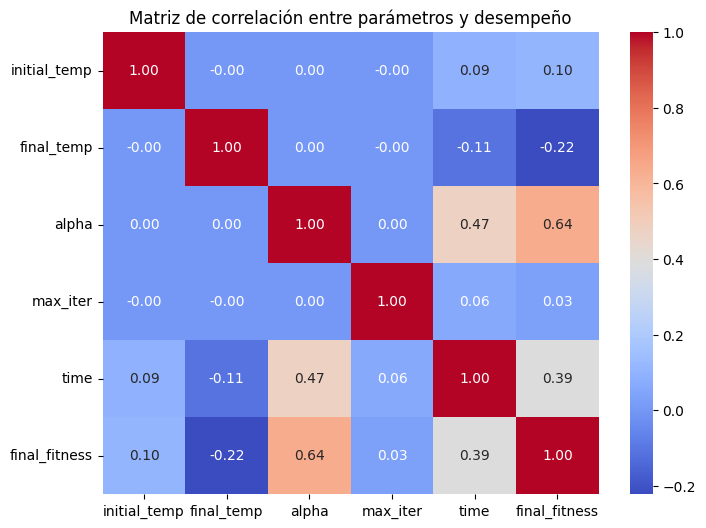

In [36]:
corr = valid_df[
    ["initial_temp", "final_temp", "alpha", "max_iter", "time", "final_fitness"]
].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación entre parámetros y desempeño")
plt.show()

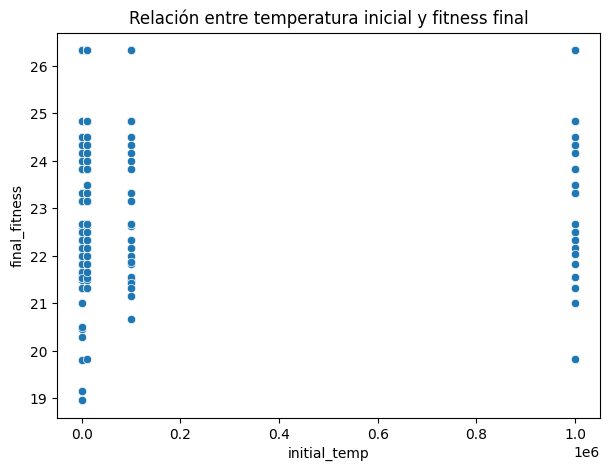

In [37]:
plt.figure(figsize=(7, 5))
sns.scatterplot(data=valid_df, x="initial_temp", y="final_fitness")
plt.title("Relación entre temperatura inicial y fitness final")
plt.show()

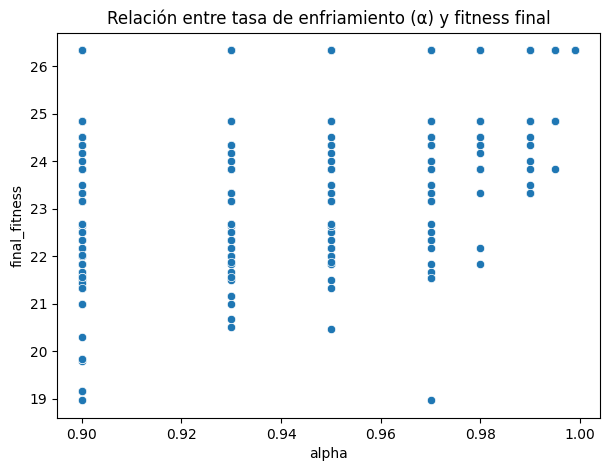

In [42]:
plt.figure(figsize=(7, 5))
sns.scatterplot(data=valid_df, x="alpha", y="final_fitness")
plt.title("Relación entre tasa de enfriamiento (α) y fitness final")
plt.show()

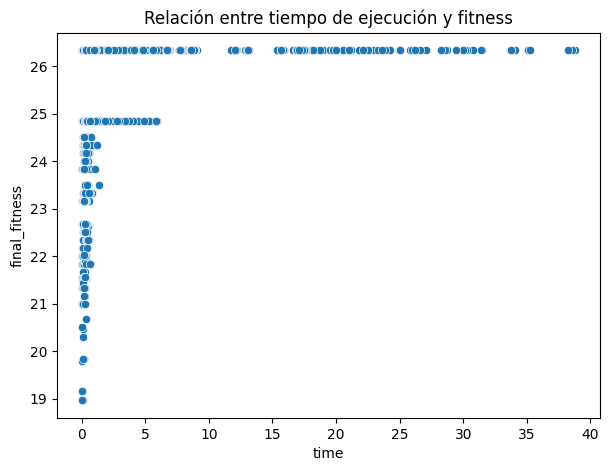

In [41]:
plt.figure(figsize=(7, 5))
sns.scatterplot(data=valid_df, x="time", y="final_fitness")
plt.title("Relación entre tiempo de ejecución y fitness")
plt.show()

In [39]:
valid_df["fitness_per_time"] = valid_df["final_fitness"] / valid_df["time"]
best_efficiency = valid_df.loc[valid_df["fitness_per_time"].idxmax()]

print("Configuración más eficiente (mejor fitness/tiempo):")
print(best_efficiency)

Configuración más eficiente (mejor fitness/tiempo):
config_id               cfg_165
initial_temp              100.0
final_temp                 10.0
alpha                       0.9
max_iter                 250000
time                       0.02
final_fitness         21.333333
validity                   True
fitness_per_time    1066.666667
Name: 164, dtype: object


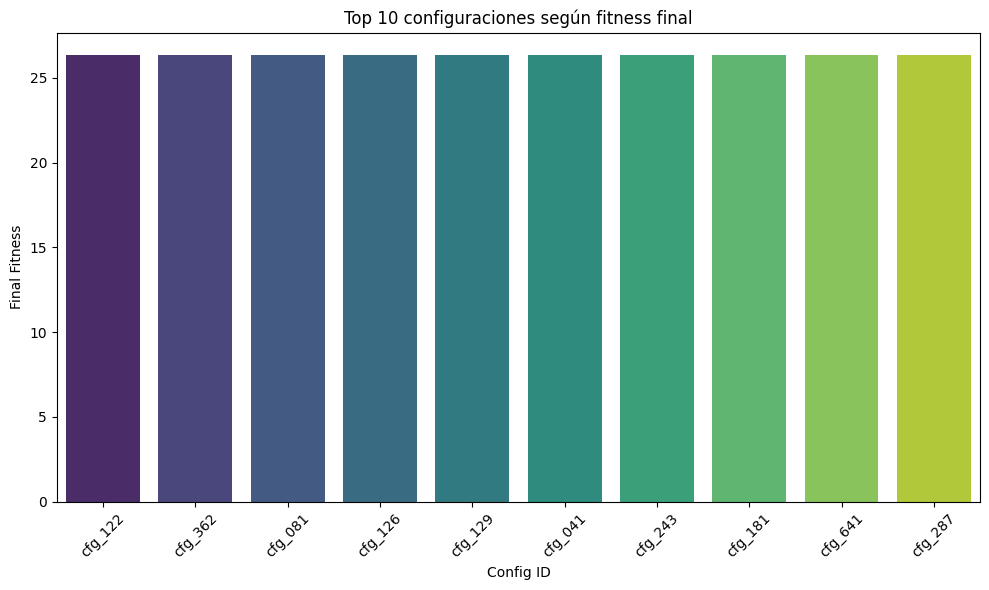

In [43]:
ranking = valid_df.sort_values(
    by=["final_fitness", "time"], ascending=[False, True]
).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=ranking,
    x="config_id",
    y="final_fitness",
    hue="config_id",
    palette="viridis",
    legend=False,
)
plt.title("Top 10 configuraciones según fitness final")
plt.xlabel("Config ID")
plt.ylabel("Final Fitness")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

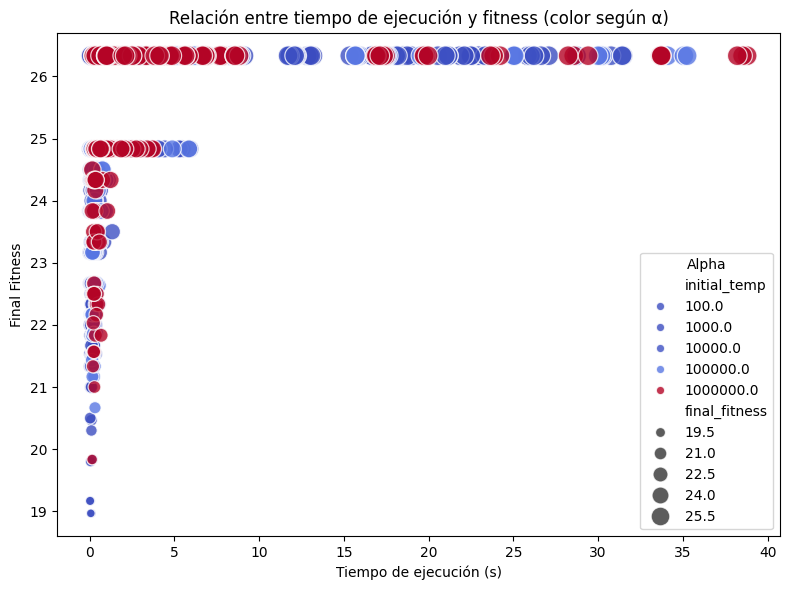

In [44]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=valid_df,
    x="time",
    y="final_fitness",
    hue="initial_temp",
    palette="coolwarm",
    size="final_fitness",
    sizes=(40, 200),
    alpha=0.8,
)
plt.title("Relación entre tiempo de ejecución y fitness (color según α)")
plt.xlabel("Tiempo de ejecución (s)")
plt.ylabel("Final Fitness")
plt.legend(title="Alpha")
plt.tight_layout()
plt.show()

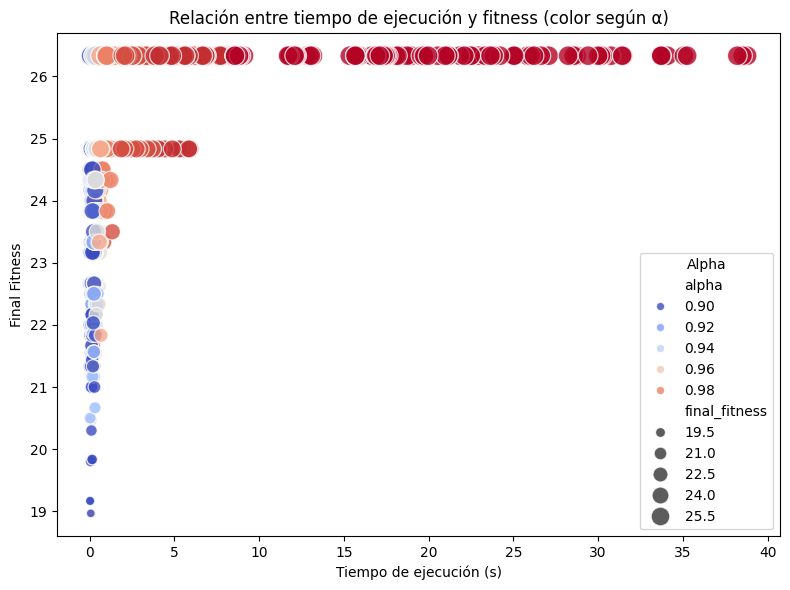

In [17]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=valid_df,
    x="time",
    y="final_fitness",
    hue="alpha",
    palette="coolwarm",
    size="final_fitness",
    sizes=(40, 200),
    alpha=0.8,
)
plt.title("Relación entre tiempo de ejecución y fitness (color según α)")
plt.xlabel("Tiempo de ejecución (s)")
plt.ylabel("Final Fitness")
plt.legend(title="Alpha")
plt.tight_layout()
plt.show()

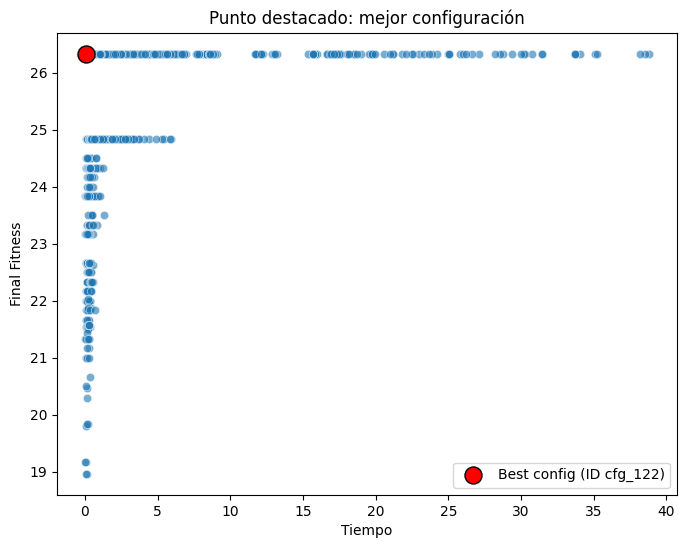

In [45]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=valid_df, x="time", y="final_fitness", alpha=0.6)
plt.scatter(
    best_config_285["time"],
    best_config_285["final_fitness"],
    color="red",
    s=150,
    edgecolor="black",
    label=f"Best config (ID {best_config_285['config_id']})",
)
plt.legend()
plt.title("Punto destacado: mejor configuración")
plt.xlabel("Tiempo")
plt.ylabel("Final Fitness")
plt.show()